In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import Library

In [ ]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Clean Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/senior/mergefile_drop_na.csv')

In [ ]:
df

,timestamp,Eeg,Temperature,RH,Windspeed,cloud_cover
0,2021-11-16 11:15:00,389.3058,29.3306,68.9674,1.7412,0.990000
1,2021-11-16 11:20:00,386.4714,29.2626,69.6372,1.7202,0.989667
2,2021-11-16 11:25:00,362.6794,29.2746,70.6488,1.7378,0.993667
3,2021-11-16 11:30:00,304.7228,29.2650,70.6084,1.6944,0.987500
4,2021-11-16 11:35:00,297.6544,29.2550,70.7396,1.7838,0.989000
...,...,...,...,...,...,...
2975,2021-12-16 13:40:00,667.8462,32.0638,38.0598,1.7466,0.185000
2976,2021-12-16 13:45:00,655.7560,32.3906,37.1100,1.7442,0.182000
2977,2021-12-16 13:50:00,647.5236,32.3444,37.1282,1.7116,0.180000
2978,2021-12-16 13:55:00,635.4336,32.3944,37.2276,1.7612,0.169000


In [ ]:
## Define null df column
df['date']=df['timestamp']
df['time']=df['timestamp']

for i,d in zip(range(len(df['timestamp'])), df['timestamp']):
 df['date'][i] = datetime.strptime(d, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
 df['time'][i] = datetime.strptime(d, '%Y-%m-%d %H:%M:%S').strftime('%H:%M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df

,timestamp,Eeg,Temperature,RH,Windspeed,cloud_cover,date,time
0,2021-11-16 11:15:00,389.3058,29.3306,68.9674,1.7412,0.990000,2021-11-16,11:15
1,2021-11-16 11:20:00,386.4714,29.2626,69.6372,1.7202,0.989667,2021-11-16,11:20
2,2021-11-16 11:25:00,362.6794,29.2746,70.6488,1.7378,0.993667,2021-11-16,11:25
3,2021-11-16 11:30:00,304.7228,29.2650,70.6084,1.6944,0.987500,2021-11-16,11:30
4,2021-11-16 11:35:00,297.6544,29.2550,70.7396,1.7838,0.989000,2021-11-16,11:35
...,...,...,...,...,...,...,...,...
2975,2021-12-16 13:40:00,667.8462,32.0638,38.0598,1.7466,0.185000,2021-12-16,13:40
2976,2021-12-16 13:45:00,655.7560,32.3906,37.1100,1.7442,0.182000,2021-12-16,13:45
2977,2021-12-16 13:50:00,647.5236,32.3444,37.1282,1.7116,0.180000,2021-12-16,13:50
2978,2021-12-16 13:55:00,635.4336,32.3944,37.2276,1.7612,0.169000,2021-12-16,13:55


In [ ]:
df.index

RangeIndex(start=0, stop=2980, step=1)

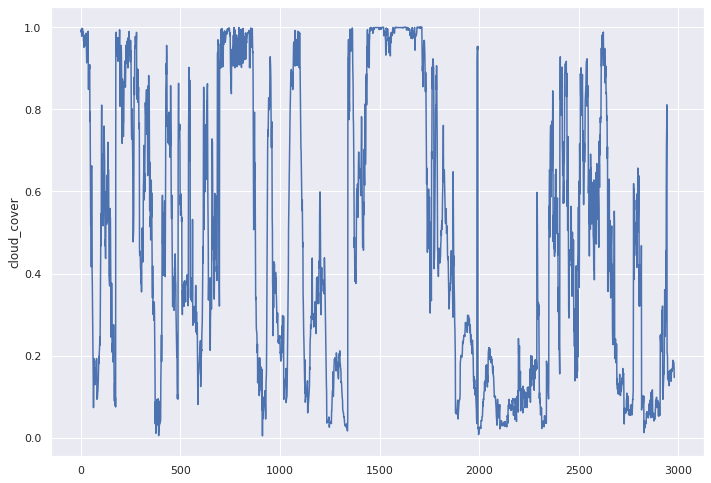

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=df.index, y=df['cloud_cover'])
plt.show()

In [ ]:
df

,timestamp,Eeg,Temperature,RH,Windspeed,cloud_cover,date,time
0,2021-11-16 11:15:00,389.3058,29.3306,68.9674,1.7412,0.990000,2021-11-16,11:15
1,2021-11-16 11:20:00,386.4714,29.2626,69.6372,1.7202,0.989667,2021-11-16,11:20
2,2021-11-16 11:25:00,362.6794,29.2746,70.6488,1.7378,0.993667,2021-11-16,11:25
3,2021-11-16 11:30:00,304.7228,29.2650,70.6084,1.6944,0.987500,2021-11-16,11:30
4,2021-11-16 11:35:00,297.6544,29.2550,70.7396,1.7838,0.989000,2021-11-16,11:35
...,...,...,...,...,...,...,...,...
2975,2021-12-16 13:40:00,667.8462,32.0638,38.0598,1.7466,0.185000,2021-12-16,13:40
2976,2021-12-16 13:45:00,655.7560,32.3906,37.1100,1.7442,0.182000,2021-12-16,13:45
2977,2021-12-16 13:50:00,647.5236,32.3444,37.1282,1.7116,0.180000,2021-12-16,13:50
2978,2021-12-16 13:55:00,635.4336,32.3944,37.2276,1.7612,0.169000,2021-12-16,13:55


In [ ]:
newcol = ['Eeg','Temperature','RH','Windspeed','cloud_cover']

### Data Visualization

In [ ]:
df.corr()

,Eeg,Temperature,RH,Windspeed,cloud_cover
Eeg,1.000000,0.263522,-0.234730,0.023203,-0.327251
Temperature,0.263522,1.000000,0.218571,0.049613,-0.052136
RH,-0.234730,0.218571,1.000000,-0.021089,0.258324
Windspeed,0.023203,0.049613,-0.021089,1.000000,-0.045113
cloud_cover,-0.327251,-0.052136,0.258324,-0.045113,1.000000


In [ ]:
scaler = MinMaxScaler()
nordf = df[['Eeg','Temperature','RH','Windspeed','cloud_cover']]
normalized_data = scaler.fit_transform(nordf)

In [ ]:
normalized_data = pd.DataFrame(normalized_data, columns=nordf.columns)

In [ ]:
newdf = normalized_data

In [ ]:
newdf['date'] = df['date']
newdf['time'] = df['time']
newdf['timestamp'] = df['timestamp']
newdf[newcol]

,Eeg,Temperature,RH,Windspeed,cloud_cover
0,0.384543,0.607617,0.635601,0.532195,0.989950
1,0.381577,0.602168,0.645935,0.494842,0.989615
2,0.356678,0.603130,0.661542,0.526147,0.993635
3,0.296024,0.602361,0.660919,0.448951,0.987437
4,0.288627,0.601559,0.662943,0.607969,0.988945
...,...,...,...,...,...
2975,0.676044,0.826625,0.158753,0.541800,0.180905
2976,0.663391,0.852811,0.144099,0.537531,0.177889
2977,0.654775,0.849109,0.144380,0.479545,0.175879
2978,0.642123,0.853116,0.145914,0.567769,0.164824


In [ ]:
newdf

,Eeg,Temperature,RH,Windspeed,cloud_cover,date,time,timestamp
0,0.384543,0.607617,0.635601,0.532195,0.989950,2021-11-16,11:15,2021-11-16 11:15:00
1,0.381577,0.602168,0.645935,0.494842,0.989615,2021-11-16,11:20,2021-11-16 11:20:00
2,0.356678,0.603130,0.661542,0.526147,0.993635,2021-11-16,11:25,2021-11-16 11:25:00
3,0.296024,0.602361,0.660919,0.448951,0.987437,2021-11-16,11:30,2021-11-16 11:30:00
4,0.288627,0.601559,0.662943,0.607969,0.988945,2021-11-16,11:35,2021-11-16 11:35:00
...,...,...,...,...,...,...,...,...
2975,0.676044,0.826625,0.158753,0.541800,0.180905,2021-12-16,13:40,2021-12-16 13:40:00
2976,0.663391,0.852811,0.144099,0.537531,0.177889,2021-12-16,13:45,2021-12-16 13:45:00
2977,0.654775,0.849109,0.144380,0.479545,0.175879,2021-12-16,13:50,2021-12-16 13:50:00
2978,0.642123,0.853116,0.145914,0.567769,0.164824,2021-12-16,13:55,2021-12-16 13:55:00


In [ ]:
newdf.corr()

,Eeg,Temperature,RH,Windspeed,cloud_cover
Eeg,1.000000,0.263522,-0.234730,0.023203,-0.327251
Temperature,0.263522,1.000000,0.218571,0.049613,-0.052136
RH,-0.234730,0.218571,1.000000,-0.021089,0.258324
Windspeed,0.023203,0.049613,-0.021089,1.000000,-0.045113
cloud_cover,-0.327251,-0.052136,0.258324,-0.045113,1.000000


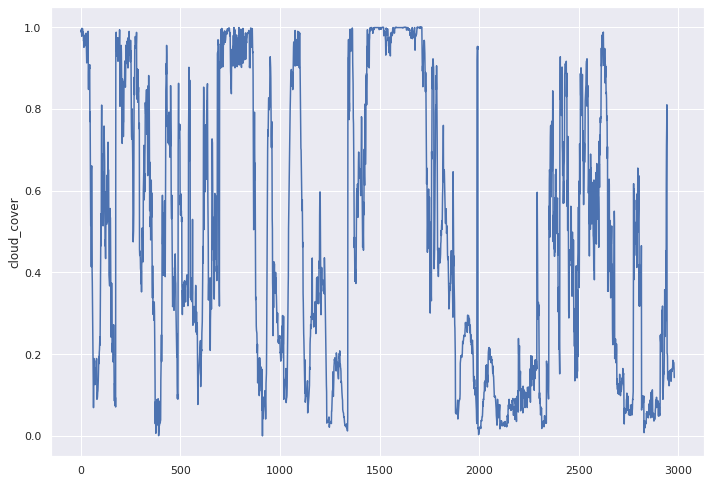

In [ ]:
sns.lineplot(x=newdf.index, y=newdf['cloud_cover'])
plt.show()

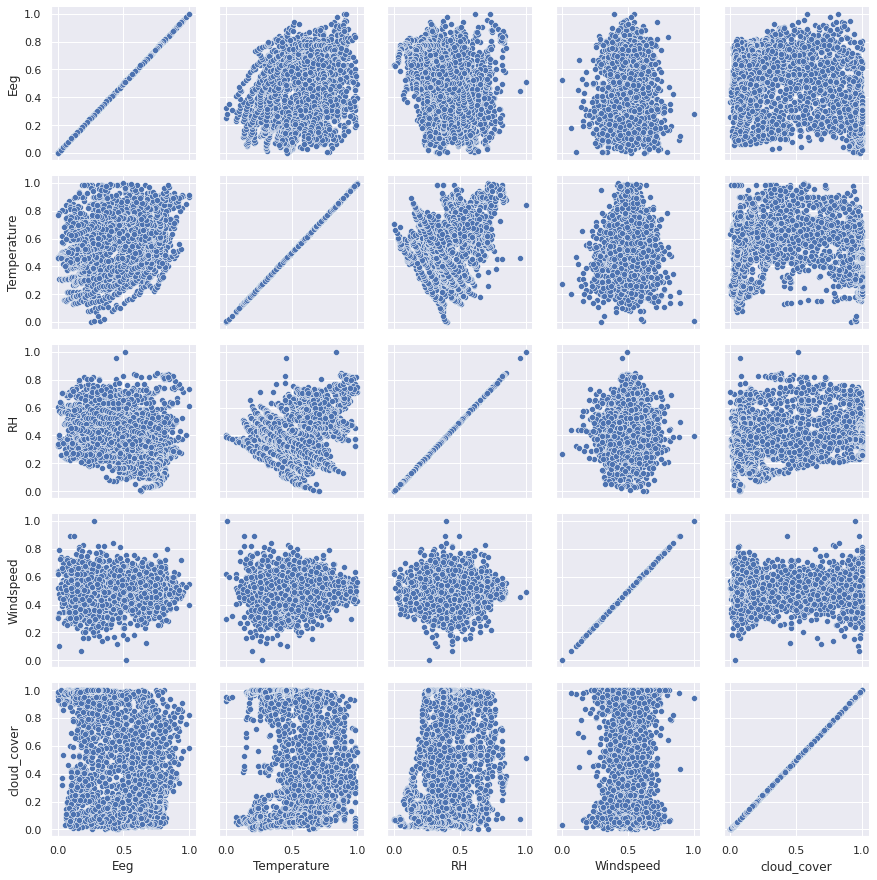

In [ ]:
g = sns.PairGrid(newdf[["Eeg", "Temperature", "RH", "Windspeed", "cloud_cover"]])
g.map(sns.scatterplot)
plt.show()

In [ ]:
newdf.corr()

,Eeg,Temperature,RH,Windspeed,cloud_cover
Eeg,1.000000,0.263522,-0.234730,0.023203,-0.327251
Temperature,0.263522,1.000000,0.218571,0.049613,-0.052136
RH,-0.234730,0.218571,1.000000,-0.021089,0.258324
Windspeed,0.023203,0.049613,-0.021089,1.000000,-0.045113
cloud_cover,-0.327251,-0.052136,0.258324,-0.045113,1.000000


### Modelling

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(interval_width=0.9)

In [ ]:
newdf

,Eeg,Temperature,RH,Windspeed,cloud_cover,date,time,timestamp
0,0.384543,0.607617,0.635601,0.532195,0.989950,2021-11-16,11:15,2021-11-16 11:15:00
1,0.381577,0.602168,0.645935,0.494842,0.989615,2021-11-16,11:20,2021-11-16 11:20:00
2,0.356678,0.603130,0.661542,0.526147,0.993635,2021-11-16,11:25,2021-11-16 11:25:00
3,0.296024,0.602361,0.660919,0.448951,0.987437,2021-11-16,11:30,2021-11-16 11:30:00
4,0.288627,0.601559,0.662943,0.607969,0.988945,2021-11-16,11:35,2021-11-16 11:35:00
...,...,...,...,...,...,...,...,...
2975,0.676044,0.826625,0.158753,0.541800,0.180905,2021-12-16,13:40,2021-12-16 13:40:00
2976,0.663391,0.852811,0.144099,0.537531,0.177889,2021-12-16,13:45,2021-12-16 13:45:00
2977,0.654775,0.849109,0.144380,0.479545,0.175879,2021-12-16,13:50,2021-12-16 13:50:00
2978,0.642123,0.853116,0.145914,0.567769,0.164824,2021-12-16,13:55,2021-12-16 13:55:00


In [ ]:
newdf=newdf.rename(columns={'timestamp':'ds','cloud_cover':'y'})

In [ ]:
newdf

,Eeg,Temperature,RH,Windspeed,y,date,time,ds
0,0.384543,0.607617,0.635601,0.532195,0.989950,2021-11-16,11:15,2021-11-16 11:15:00
1,0.381577,0.602168,0.645935,0.494842,0.989615,2021-11-16,11:20,2021-11-16 11:20:00
2,0.356678,0.603130,0.661542,0.526147,0.993635,2021-11-16,11:25,2021-11-16 11:25:00
3,0.296024,0.602361,0.660919,0.448951,0.987437,2021-11-16,11:30,2021-11-16 11:30:00
4,0.288627,0.601559,0.662943,0.607969,0.988945,2021-11-16,11:35,2021-11-16 11:35:00
...,...,...,...,...,...,...,...,...
2975,0.676044,0.826625,0.158753,0.541800,0.180905,2021-12-16,13:40,2021-12-16 13:40:00
2976,0.663391,0.852811,0.144099,0.537531,0.177889,2021-12-16,13:45,2021-12-16 13:45:00
2977,0.654775,0.849109,0.144380,0.479545,0.175879,2021-12-16,13:50,2021-12-16 13:50:00
2978,0.642123,0.853116,0.145914,0.567769,0.164824,2021-12-16,13:55,2021-12-16 13:55:00


In [ ]:
dftrain = newdf[:2383]
dftest = newdf[2384:]

In [ ]:
dftrain=dftrain.drop(['date','time'], axis=1)
dftrain=dftrain[['ds','y','Eeg','Temperature','RH','Windspeed']]
dftrain

,ds,y,Eeg,Temperature,RH,Windspeed
0,2021-11-16 11:15:00,0.989950,0.384543,0.607617,0.635601,0.532195
1,2021-11-16 11:20:00,0.989615,0.381577,0.602168,0.645935,0.494842
2,2021-11-16 11:25:00,0.993635,0.356678,0.603130,0.661542,0.526147
3,2021-11-16 11:30:00,0.987437,0.296024,0.602361,0.660919,0.448951
4,2021-11-16 11:35:00,0.988945,0.288627,0.601559,0.662943,0.607969
...,...,...,...,...,...,...
2378,2021-12-10 14:40:00,0.439196,0.517259,0.751384,0.298767,0.429740
2379,2021-12-10 14:45:00,0.582915,0.489234,0.738451,0.306814,0.580221
2380,2021-12-10 14:50:00,0.579899,0.492422,0.732506,0.309851,0.654216
2381,2021-12-10 14:55:00,0.450251,0.468286,0.734493,0.303994,0.528993


In [ ]:
dftest=dftest.drop(['date','time'], axis=1)
dftest=dftest[['ds','y','Eeg','Temperature','RH','Windspeed']]
dftest

,ds,y,Eeg,Temperature,RH,Windspeed
2384,2021-12-10 15:15:00,0.598995,0.401392,0.711624,0.331564,0.440413
2385,2021-12-10 15:20:00,0.652261,0.437578,0.694208,0.344635,0.557631
2386,2021-12-10 15:25:00,0.585930,0.507486,0.726560,0.335409,0.590537
2387,2021-12-10 15:30:00,0.574874,0.482526,0.701913,0.343836,0.449662
2388,2021-12-10 15:35:00,0.551759,0.395534,0.689925,0.355894,0.534329
...,...,...,...,...,...,...
2975,2021-12-16 13:40:00,0.180905,0.676044,0.826625,0.158753,0.541800
2976,2021-12-16 13:45:00,0.177889,0.663391,0.852811,0.144099,0.537531
2977,2021-12-16 13:50:00,0.175879,0.654775,0.849109,0.144380,0.479545
2978,2021-12-16 13:55:00,0.164824,0.642123,0.853116,0.145914,0.567769


In [ ]:
model.add_regressor('Eeg', standardize=False)
model.add_regressor('Temperature', standardize=False)
model.add_regressor('RH', standardize=False)
model.add_regressor('Windspeed', standardize=False)

In [ ]:
model.fit(dftrain)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9jokvwff/y_z0pzym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9jokvwff/xb5ajhko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58463', 'data', 'file=/tmp/tmp9jokvwff/y_z0pzym.json', 'init=/tmp/tmp9jokvwff/xb5ajhko.json', 'output', 'file=/tmp/tmp9jokvwff/prophet_model94adqg86/prophet_model-20221104110711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:07:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:07:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(dftest)
forecast = forecast[['ds','yhat']]
forecast

,ds,yhat
0,2021-12-10 15:15:00,0.038687
1,2021-12-10 15:20:00,-0.009754
2,2021-12-10 15:25:00,-0.097062
3,2021-12-10 15:30:00,-0.082174
4,2021-12-10 15:35:00,-0.024712
...,...,...
591,2021-12-16 13:40:00,-0.238504
592,2021-12-16 13:45:00,-0.245104
593,2021-12-16 13:50:00,-0.246874
594,2021-12-16 13:55:00,-0.252461


In [ ]:
dftest

,ds,y,Eeg,Temperature,RH,Windspeed
2384,2021-12-10 15:15:00,0.598995,0.401392,0.711624,0.331564,0.440413
2385,2021-12-10 15:20:00,0.652261,0.437578,0.694208,0.344635,0.557631
2386,2021-12-10 15:25:00,0.585930,0.507486,0.726560,0.335409,0.590537
2387,2021-12-10 15:30:00,0.574874,0.482526,0.701913,0.343836,0.449662
2388,2021-12-10 15:35:00,0.551759,0.395534,0.689925,0.355894,0.534329
...,...,...,...,...,...,...
2975,2021-12-16 13:40:00,0.180905,0.676044,0.826625,0.158753,0.541800
2976,2021-12-16 13:45:00,0.177889,0.663391,0.852811,0.144099,0.537531
2977,2021-12-16 13:50:00,0.175879,0.654775,0.849109,0.144380,0.479545
2978,2021-12-16 13:55:00,0.164824,0.642123,0.853116,0.145914,0.567769
